In [132]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
vaccine_file = '/mnt/d/books/iitm/agentBased/data/tn/incovid19/vaccine/original.csv'

In [24]:
types = defaultdict(lambda: "Int64")
types["S No"] = "Int64"
types["State_Code"] = "string"
types["State"] = "string"
types["District_Key"] = "string"
types["Cowin Key"] = "string"
types["District"] = "string"

In [102]:
vaccine_df = pd.read_csv(vaccine_file, sep=',', skiprows=[1], dtype=types)

In [30]:
vaccine_df.head()

,S No,State_Code,State,District_Key,Cowin Key,District,16/01/2021,16/01/2021.1,16/01/2021.2,16/01/2021.3,...,09/01/2022.2,01/11/2021,01/11/2021.1,01/11/2021.2,10/01/2022,10/01/2022.1,10/01/2022.2,07/01/2022,07/01/2022.1,07/01/2022.2
0,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobar,Nicobars,745.0,0.0,0.0,0.0,...,53508.0,25397.0,20335.0,45732.0,26592.0,27105.0,53697.0,26319.0,27036.0,53355.0
1,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,North and Middle Andaman,1496.0,0.0,0.0,0.0,...,159039.0,78956.0,59598.0,138554.0,83985.0,75744.0,159729.0,82988.0,75690.0,158678.0
2,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,South Andaman,6028.0,2.0,2.0,23.0,...,399243.0,189744.0,121292.0,311036.0,206871.0,193856.0,400727.0,204401.0,192987.0,397388.0
3,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,Anantapur,20781.0,28.0,26.0,287.0,...,5978727.0,2697182.0,1621465.0,4318647.0,3428782.0,2565665.0,5994447.0,3386628.0,2523642.0,5910270.0
4,5,AP,Andhra Pradesh,AP_Chittoor,Chittoor,Chittoor,26285.0,63.0,31.0,424.0,...,6495693.0,2838919.0,1819732.0,4658651.0,3609486.0,2906217.0,6515703.0,3593576.0,2871642.0,6465218.0


In [117]:
tmp = pd.read_csv(vaccine_file, sep=',', header=[0,1], nrows=1)
tmp

S No State_Code                        State District_Key Cowin Key  \
                                                                        
0    1         AN  Andaman and Nicobar Islands  AN_Nicobars   Nicobar   

   District                   16/01/2021                  \
            Total Individuals Registered Sessions Sites    
0  Nicobars                        745.0      0.0    0.0   

                           ...               09/01/2022  \
  First Dose Administered  ... Total Doses Administered   
0                     0.0  ...                  53508.0   

               01/11/2021                                                    \
  First Dose Administered Second Dose Administered Total Doses Administered   
0                 25397.0                  20335.0                  45732.0   

               10/01/2022                                                    \
  First Dose Administered Second Dose Administered Total Doses Administered   
0                 26592.0                  27105.0                  53697.0   

               07/01/2022                                                    
  First Dose Administered Second Dose Administered Total Doses Administered  
0                 26319.0                  27036.0                  53355.0  

[1 rows x 3109 columns]

In [118]:
tmp.columns

MultiIndex([(        'S No',                            ' '),
            (  'State_Code',                            ' '),
            (       'State',                            ' '),
            ('District_Key',                            ' '),
            (   'Cowin Key',                            ' '),
            (    'District',                            ' '),
            (  '16/01/2021', 'Total Individuals Registered'),
            (  '16/01/2021',                     'Sessions'),
            (  '16/01/2021',                       'Sites '),
            (  '16/01/2021',      'First Dose Administered'),
            ...
            (  '09/01/2022',     'Total Doses Administered'),
            (  '01/11/2021',      'First Dose Administered'),
            (  '01/11/2021',     'Second Dose Administered'),
            (  '01/11/2021',     'Total Doses Administered'),
            (  '10/01/2022',      'First Dose Administered'),
            (  '10/01/2022',     'Second Dose Administ

In [119]:
tmp.columns = tmp.columns.map(lambda r: ('', r[0]) if r[1] == ' ' else r)
tmp

\
  S No State_Code                        State District_Key Cowin Key   
0    1         AN  Andaman and Nicobar Islands  AN_Nicobars   Nicobar   

                              16/01/2021                  \
   District Total Individuals Registered Sessions Sites    
0  Nicobars                        745.0      0.0    0.0   

                           ...               09/01/2022  \
  First Dose Administered  ... Total Doses Administered   
0                     0.0  ...                  53508.0   

               01/11/2021                                                    \
  First Dose Administered Second Dose Administered Total Doses Administered   
0                 25397.0                  20335.0                  45732.0   

               10/01/2022                                                    \
  First Dose Administered Second Dose Administered Total Doses Administered   
0                 26592.0                  27105.0                  53697.0   

               07/01/2022                                                    
  First Dose Administered Second Dose Administered Total Doses Administered  
0                 26319.0                  27036.0                  53355.0  

[1 rows x 3109 columns]

In [120]:
vaccine_df.columns = tmp.columns
vaccine_df.head(n=2)

\
  S No State_Code                        State                 District_Key   
0    1         AN  Andaman and Nicobar Islands                  AN_Nicobars   
1    2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   

                                                       \
                  Cowin Key                  District   
0                   Nicobar                  Nicobars   
1  North and Middle Andaman  North and Middle Andaman   

                    16/01/2021                                          ...  \
  Total Individuals Registered Sessions Sites  First Dose Administered  ...   
0                        745.0      0.0    0.0                     0.0  ...   
1                       1496.0      0.0    0.0                     0.0  ...   

                09/01/2022              01/11/2021                           \
  Total Doses Administered First Dose Administered Second Dose Administered   
0                  53508.0                 25397.0                  20335.0   
1                 159039.0                 78956.0                  59598.0   

                                        10/01/2022                           \
  Total Doses Administered First Dose Administered Second Dose Administered   
0                  45732.0                 26592.0                  27105.0   
1                 138554.0                 83985.0                  75744.0   

                                        07/01/2022                           \
  Total Doses Administered First Dose Administered Second Dose Administered   
0                  53697.0                 26319.0                  27036.0   
1                 159729.0                 82988.0                  75690.0   

                            
  Total Doses Administered  
0                  53355.0  
1                 158678.0  

[2 rows x 3109 columns]

In [125]:
tn_df = vaccine_df[vaccine_df[('', 'State_Code')] == 'TN'].reset_index(drop=True)
tn_df.head(n=2)

\
  S No State_Code       State    District_Key   Cowin Key     District   
0  553         TN  Tamil Nadu  TN_Pudukkottai  Aranthangi  Pudukkottai   
1  554         TN  Tamil Nadu     TN_Ariyalur    Ariyalur     Ariyalur   

                    16/01/2021                                          ...  \
  Total Individuals Registered Sessions Sites  First Dose Administered  ...   
0                        450.0      3.0    3.0                     2.0  ...   
1                       1889.0      3.0    3.0                     9.0  ...   

                09/01/2022              01/11/2021                           \
  Total Doses Administered First Dose Administered Second Dose Administered   
0                1911889.0                827584.0                 316931.0   
1                1047790.0                476952.0                 159311.0   

                                        10/01/2022                           \
  Total Doses Administered First Dose Administered Second Dose Administered   
0                1144515.0               1125418.0                 792643.0   
1                 636263.0                625987.0                 424812.0   

                                        07/01/2022                           \
  Total Doses Administered First Dose Administered Second Dose Administered   
0                1918061.0               1112582.0                 770795.0   
1                1050799.0                620452.0                 414763.0   

                            
  Total Doses Administered  
0                1883377.0  
1                1035215.0  

[2 rows x 3109 columns]

In [170]:
def get_vaccine_data(df):
    start = datetime.strptime('16/01/2021', '%d/%m/%Y')
    end = datetime.strptime('07/01/2022', '%d/%m/%Y')
    columns = {'state':[], 'district':[], 'date':[], 'cum_first_dose':[], 'cum_second_dose':[]}

    size, _ = df.shape
    state_col, district_col = df[('', 'State')].tolist(), df[('', 'District')].tolist()    
    while start <= end:
        curr_date = start.strftime('%d/%m/%Y')
        columns['state'].extend(state_col)
        columns['district'].extend(district_col)
        columns['date'].extend([curr_date] * size)
        columns['cum_first_dose'].extend(df[(curr_date, 'First Dose Administered')].tolist())
        columns['cum_second_dose'].extend(df[(curr_date, 'Second Dose Administered')].tolist())
        start += timedelta(days=1)
    return pd.DataFrame(columns)

In [176]:
tn_vacc = get_vaccine_data(tn_df)

In [177]:
tn_vacc.head(n=2)

,state,district,date,cum_first_dose,cum_second_dose
0,Tamil Nadu,Pudukkottai,16/01/2021,2.0,0.0
1,Tamil Nadu,Ariyalur,16/01/2021,9.0,0.0


In [173]:
def get_daily_cases(row, key, prev_cnt):
    if  pd.isnull(row[key]) or row[key] == 0:
        return 0
    daily_cnt = row[key] - prev_cnt[row['district']]
    if daily_cnt < 0:
        # print(f'{row["date"]} {row["district"]} {row[key]} {prev_cnt[row["district"]]}')
        daily_cnt = 0
    prev_cnt[row['district']] = row[key]
    return daily_cnt

In [178]:
prev_first_cnt = defaultdict(int)
tn_vacc['new_first_dose'] = tn_vacc.apply(lambda r: get_daily_cases(r, 'cum_first_dose', prev_first_cnt), axis=1)

In [181]:
prev_second_cnt = defaultdict(int)
tn_vacc['new_second_dose'] = tn_vacc.apply(lambda r: get_daily_cases(r, 'cum_second_dose', prev_second_cnt), axis=1)

<AxesSubplot:xlabel='date'>

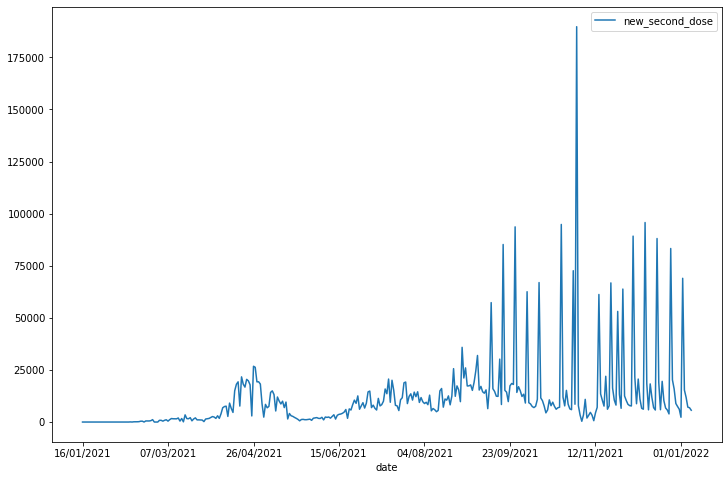

In [184]:
fig, ax = plt.subplots(figsize=(12, 8))
tn_vacc[tn_vacc['district']=='Chennai'].plot(ax=ax, kind='line', x='date', y='new_second_dose')